In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [182]:
b = np.array([34,-17])
b = b.reshape(2,1)
Q = np.array([[9, -8], [-8, 9]])


def f(x):
    return 1/2*(x.T)@Q@(x) - b.T@(x) + 110


def Fx(xk,xopt):
    return f(xk) - f(xopt)

In [183]:
xopt = np.linalg.inv(Q)@b
xopt = xopt.reshape(2,1)
print(xopt, f(xopt))


[[10.]
 [ 7.]] [[-0.5]]


In [229]:

convegance_ratio = []
x0 = np.array([4,0])
x0 = x0.reshape(2,1)
xk = x0
xk_1 = np.array([1000,1000]).reshape(2,1)
xarr = [x0]

for j in range(30):
    d = (-(Q@xk - b)).reshape(2,1)
    a0 = ((d.T@d)/(d.T@Q@d))[0][0]
    xk_1 = xk + a0*d
    xarr.append(xk_1)
    xk = xk_1

xarr= np.array(xarr).squeeze()
print(xarr.shape)

(31, 2)


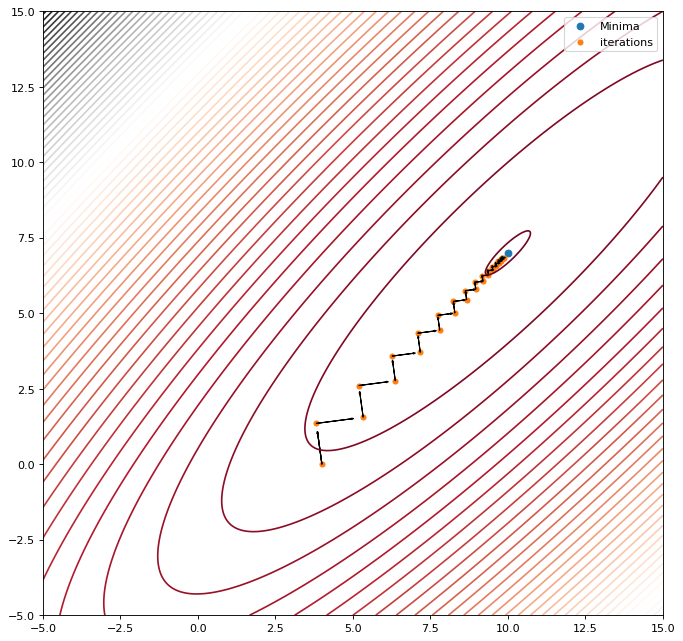

<Figure size 432x288 with 0 Axes>

In [240]:
u = np.linspace(-5,15, 1000)
x, y = np.meshgrid(u,u)
z = 1/2*(9*x**2 - 8*x*y*2+9*y**2) - 34*x + 17*y + 110
plt.figure(figsize=(10,10), dpi = 80)
plt.contour(x,y,z, 60, cmap = "RdGy")
plt.scatter(xopt[0],xopt[1])
plt.scatter(xarr[:,0], xarr[:,1], s = 20)
for i in range(xarr[:,0].shape[0]-1):
    plt.arrow(xarr[i,0], xarr[i,1], (xarr[i+1,0] -xarr[i,0] )*0.75,(xarr[i+1,1] -xarr[i,1] )*0.75, head_width=0.05)
plt.arrow(xarr[0,0], xarr[0,1], (xarr[1,0] -xarr[0,0] )*0.75,(xarr[1,1] -xarr[0,1] )*0.75, head_width=0.05)
plt.legend(["Minima",  "iterations"])
plt.show()
plt.savefig("ters.pdf")